# Simple process of this project

### Python 3.8.8
### CV2 4.6.0
### numpy 1.20.1
### matplotlib 3.3.4
### sklearn 0.24.1
### PIL 8.2.0
### keras 2.9.0
### skimage 0.18.1
### pandas 1.2.4

In [1]:
### import library ###
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from PIL import Image
import math
from keras import models
import pickle
from skimage.transform import resize
import pandas as pd
import os

In [2]:
# FUNCTION: lable fingers for segentation
def draw_hand_pts_lines(cv2_img,
                        palm_color,
                        thumb_color,
                        index_color,
                        middle_color,
                        ring_color,
                        pinky_color):
    
    # index
    index_end = np.array(handList[5])
    index_end[1]  = np.array(handList[0])[1]
    index_end = list(index_end)
    
    # middle
    middle_end = np.array(handList[9])
    middle_end[1]  = np.array(handList[0])[1]
    middle_end = list(middle_end)
    
    # ring
    ring_end = np.array(handList[13])
    ring_end[1]  = np.array(handList[0])[1]
    ring_end = list(ring_end)
    
    # pinky
    pinky_end = np.array(handList[17])
    pinky_end[1]  = np.array(handList[0])[1]
    pinky_end = list(pinky_end)
    
    cv2.circle(cv2_img, handList[5], 50, index_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[9], 50, middle_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[13], 50, ring_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[17], 50, pinky_color, cv2.FILLED)
    
    cv2.circle(cv2_img, handList[4], 35, thumb_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[8], 60, index_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[12], 60, middle_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[16], 60, ring_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[20], 60, pinky_color, cv2.FILLED)
    
    cv2.circle(cv2_img, handList[3], 20, thumb_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[7], 60, index_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[11], 60, middle_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[15], 60, ring_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[19], 60, pinky_color, cv2.FILLED)
    
    cv2.circle(cv2_img, handList[6], 60, index_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[10], 60, middle_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[14], 60, ring_color, cv2.FILLED)
    cv2.circle(cv2_img, handList[18], 60, pinky_color, cv2.FILLED)
    
    cv2.circle(cv2_img, index_end, 60, index_color, cv2.FILLED)
    cv2.circle(cv2_img, middle_end, 60, middle_color, cv2.FILLED)
    cv2.circle(cv2_img, ring_end, 60, ring_color, cv2.FILLED)
    cv2.circle(cv2_img, pinky_end, 60, pinky_color, cv2.FILLED)
    
    return cv2_img

In [3]:
# First step is to initialize the Hands class an store it in a variable
mp_hands = mp.solutions.hands

# Now second step is to set the hands function which will hold the landmarks points
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.3)

# Last step is to set up the drawing function of hands landmarks on the image
mp_drawing = mp.solutions.drawing_utils

# Load Classifiers
Dense_model = models.load_model("CNN_DenseNet169.h5",compile=False)

(-0.5, 511.5, 731.5, -0.5)

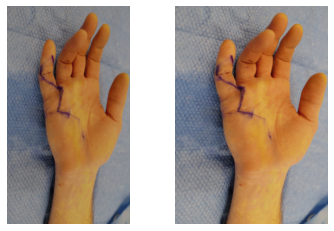

In [4]:
# Read image
sample_img_color = cv2.imread("images/injured/Flexor-tendon-repair-2.png")
sample_img_color = cv2.cvtColor(sample_img_color, cv2.COLOR_BGR2RGB)
sample_img_color = resize(sample_img_color, [1920, 1080, 3])*sample_img_color.max()
sample_img_color = sample_img_color.astype('uint8')

sample_img = Image.open("images/injured/Flexor-tendon-repair-2.png")
sample_img = np.array(sample_img)

plt.figure()
plt.subplot((121))
plt.imshow(sample_img_color)
plt.axis('off')
plt.subplot((122))
plt.imshow(sample_img)
plt.axis('off')


C:\Users\User\anaconda3\myanaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(-0.5, 1079.5, 1919.5, -0.5)

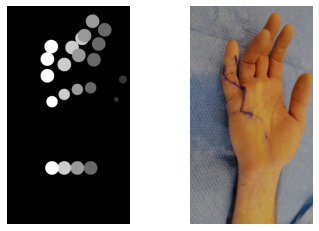

In [5]:
results = hands.process(sample_img[:,:,0:3])

img_copy = sample_img.copy()
plain_img = np.zeros((1920, 1080, 3))
handList = []

if results.multi_hand_landmarks:
        
    for hand_no, hand_landmarks in enumerate(results.multi_hand_landmarks):
                
        for idx, lm in enumerate(hand_landmarks.landmark):
            h, w, c = plain_img.shape
            cx, cy = int(lm.x * w), int(lm.y * h)
            handList.append((cx, cy))
            
plain_img = draw_hand_pts_lines(plain_img,
                               [25, 25, 25],
                               [54, 54, 54],
                            [104, 104, 104],
                            [154, 154, 154],
                            [204, 204, 204],
                            [255, 255, 255])
    
rgb_weights = [0.1140, 0.2989, 0.5870]
grayscale_image = np.dot(plain_img[...,:3], rgb_weights)
    
sample_img = resize(sample_img, [1920, 1080, 3])*sample_img.max()
sample_img = sample_img.astype('uint8')

# label
labelencoder = LabelEncoder()
h, w = grayscale_image.shape
grayscale_image_reshaped = grayscale_image.reshape(-1,1)
grayscale_image_reshaped_encoded = labelencoder.fit_transform(grayscale_image_reshaped)
grayscale_image_reshaped_encoded_original_shape = grayscale_image_reshaped_encoded.reshape(h, w)
    
plt.figure()
plt.subplot((121))
plt.imshow(grayscale_image,cmap="gray")
plt.axis('off')
plt.subplot((122))
plt.imshow(sample_img_color)
plt.axis('off')

(-0.5, 127.5, 511.5, -0.5)

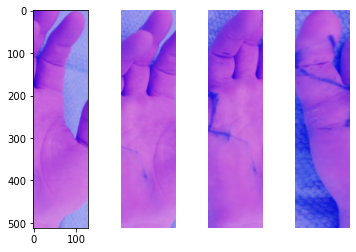

In [6]:
# Crop finger images
# index
index_mask = np.where(grayscale_image_reshaped_encoded_original_shape == 2)
index_area = sample_img[index_mask[0].min():index_mask[0].max(),index_mask[1].min():index_mask[1].max()]
index_area = resize(index_area, [512, 128, 3])

# midl
midl_mask = np.where(grayscale_image_reshaped_encoded_original_shape == 3)
midl_area = sample_img[midl_mask[0].min():midl_mask[0].max(),midl_mask[1].min():midl_mask[1].max()]
midl_area = resize(midl_area, [512, 128, 3])

# ring
ring_mask = np.where(grayscale_image_reshaped_encoded_original_shape == 4)
ring_area = sample_img[ring_mask[0].min():ring_mask[0].max(),ring_mask[1].min():ring_mask[1].max()]
ring_area = resize(ring_area, [512, 128, 3])

# picky
picky_mask = np.where(grayscale_image_reshaped_encoded_original_shape == 5)
picky_area = sample_img[picky_mask[0].min():picky_mask[0].max(),picky_mask[1].min():picky_mask[1].max()]
picky_area = resize(picky_area, [512, 128, 3])

plt.figure()
plt.subplot((141))
plt.imshow(index_area)
plt.subplot((142))
plt.imshow(midl_area)
plt.axis('off')
plt.subplot((143))
plt.imshow(ring_area)
plt.axis('off')
plt.subplot((144))
plt.imshow(picky_area)
plt.axis('off')

(-0.5, 1079.5, 1919.5, -0.5)

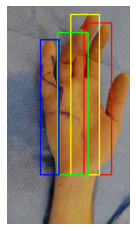

In [7]:
# Draw fingers areas on hand image
sample_img_color = cv2.rectangle(sample_img_color,
                                 (index_mask[1].min(),index_mask[0].min()),
                                 (index_mask[1].max(),index_mask[0].max()),
                                 (255,0,0),10)
sample_img_color = cv2.rectangle(sample_img_color,
                                 (midl_mask[1].min(),midl_mask[0].min()),
                                 (midl_mask[1].max(),midl_mask[0].max()),
                                 (255,255,0),10)
sample_img_color = cv2.rectangle(sample_img_color,
                                 (ring_mask[1].min(),ring_mask[0].min()),
                                 (ring_mask[1].max(),ring_mask[0].max()),
                                 (0,255,0),10)
sample_img_color = cv2.rectangle(sample_img_color,
                                 (picky_mask[1].min(),picky_mask[0].min()),
                                 (picky_mask[1].max(),picky_mask[0].max()),
                                 (0,0,255),10)

plt.figure()
plt.imshow(sample_img_color)
plt.axis('off')

In [8]:
# Prediction
input_fingers = []
input_fingers.append(index_area)
input_fingers.append(midl_area)
input_fingers.append(ring_area)
input_fingers.append(picky_area)
input_fingers = np.array(input_fingers)
grades = Dense_model.predict(input_fingers)
grades = np.argmax(grades,axis = 1) 




1/1 [==============================] - 3s 3s/step


(-0.5, 1079.5, 1919.5, -0.5)

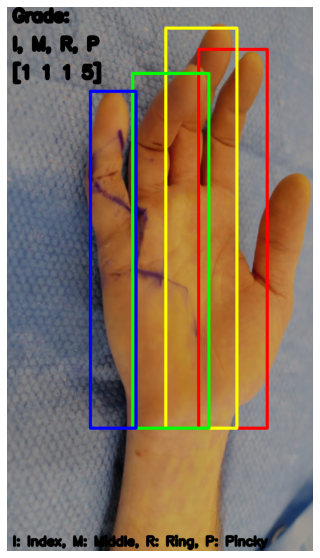

In [9]:
font                   = cv2.FONT_HERSHEY_SIMPLEX
location1              = (20,150)
location2              = (20,250)
fontScale              = 2
fontColor              = (0,0,0)
thickness              = 15
lineType               = 2

cv2.putText(sample_img_color,'Grade:', 
            (20,50), 
            font, 
            fontScale,
            fontColor,
            thickness,
            lineType)
        
cv2.putText(sample_img_color,'I, M, R, P', 
            location1, 
            font, 
            fontScale,
            fontColor,
            thickness,
            lineType)
        
cv2.putText(sample_img_color, np.array2string(grades+1), 
            location2, 
            font, 
            fontScale,
            fontColor,
            thickness,
            lineType)

cv2.putText(sample_img_color, "I: Index, M: Middle, R: Ring, P: Pincky", 
            (20,1900), 
            font, 
            1.5,
            fontColor,
            10,
            lineType)
plt.figure(figsize=(10,10))
plt.imshow(sample_img_color)
plt.axis('off')